##K Vecinos mas cercanos
K-Nearest-Neighbor (KNN) es un algoritmo basado en instancia de tipo supervisado de Aprendizaje Automatico (Machine Learning). Puede usarse para clasificar nuevas muestras (valores discretos) o para predecir (regresión, valores continuos). Al ser un método sencillo, es ideal para introducirse en el mundo del  Aprendizaje Automático. Sirve esencialmente para clasificar valores buscando los puntos de datos “más similares” (por cercanía) aprendidos en la etapa de entrenamiento y haciendo conjeturas sobre nuevos puntos basado en esa clasificación.

#¿Que es el algoritmo de knn?

Es un método que simplemente busca en las observaciones más cercanas a la que se está tratando de predecir y clasifica el punto de interés basado en la mayoría de datos que le rodean. Este algoritmo es:

* **Supervisado:** esto -brevemente- quiere decir que tenemos etiquetado nuestro conjunto de datos de entrenamiento, con la clase o resultado esperado dada “una fila” de datos.
* **Basado en Instancia:** Esto quiere decir que nuestro algoritmo no aprende explícitamente un modelo (como por ejemplo en Regresión Logística o árboles de decisión). En cambio memoriza las instancias de entrenamiento que son usadas como “base de conocimiento” para la fase de predicción.

#¿Como funciona KNN?


1. Calcular la distancia entre el ejemplo a clasificar y el resto de ejemplos del dataset de entrenamiento.
2. Seleccionar los “k” elementos más cercanos (con menor distancia, según la función que se use)
3. Realizar una “votación de mayoría” entre los k puntos: los de una clase/etiqueta que dominen decidirán su clasificación final.

Teniendo en cuenta el punto 3, veremos que para decidir la clase de un punto es muy importante el valor de k, pues este terminará casi por definir a qué grupo pertenecerán los puntos, sobre todo en las “fronteras” entre grupos. Por ejemplo -y a priori- yo elegiría valores impares de k para desempatar (si las features que utilizamos son pares). No será lo mismo tomar para decidir 3 valores que 13. Esto no quiere decir que necesariamente tomar más puntos implique mejorar la precisión. Lo que es seguro es que cuantos más “puntos k”, más tardará nuestro algoritmo en procesar y darnos respuesta.

Las formas más populares de “medir la cercanía” entre puntos son la distancia Euclidiana (la “de siempre”) o la Cosine Similarity (mide el ángulo de  los vectores, cuanto menores, serán similares). Recordemos que este algoritmo -y prácticamente todos en ML- funcionan mejor con varias características de las que tomemos datos (las columnas de nuestro dataset). Lo que entendemos como “distancia” en la vida real, quedará abstracto a muchas dimensiones que no podemos “visualizar” fácilmente.

##Para realizar el algoritmo KNN

1.Se cargan los datos

2.Se inicializa K con el número de vecinos que usted elija.

3.Para cada ejemplo en los datos:

  3.1 Se calcula la distancia entre el ejemplo de la consulta y el ejemplo actual a partir de los datos.

  3.2 Sume la distancia y el índice del ejemplo a una colección ordenada

4.Se ordena la colección ordenada de distancias e índices de menor a mayor (en orden ascendente) por las distancias

5.Elija las primeras entradas K de la colección clasificada

6.Obtener las etiquetas de las entradas K seleccionadas

7.Si es regresión, devuelve la media de las etiquetas K

8.Si es clasificación, devuelve las etiquetas K

Entonces, primero vamos a cargar las dependencias y la base de datos:


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('../content/sample_data/iris.csv')

Comando para observar los primeros 5 datos contenidos en la base de datos

In [3]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Con este comando, podemos observar tambien la informacion general de la base de datos que tenemos

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Tambien podemos solicitar una descripcion

In [5]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Inclusive podemos contar las diferentes clases dentro del dataset utilizando la columna de 'Species'

In [6]:
data['variety'].value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

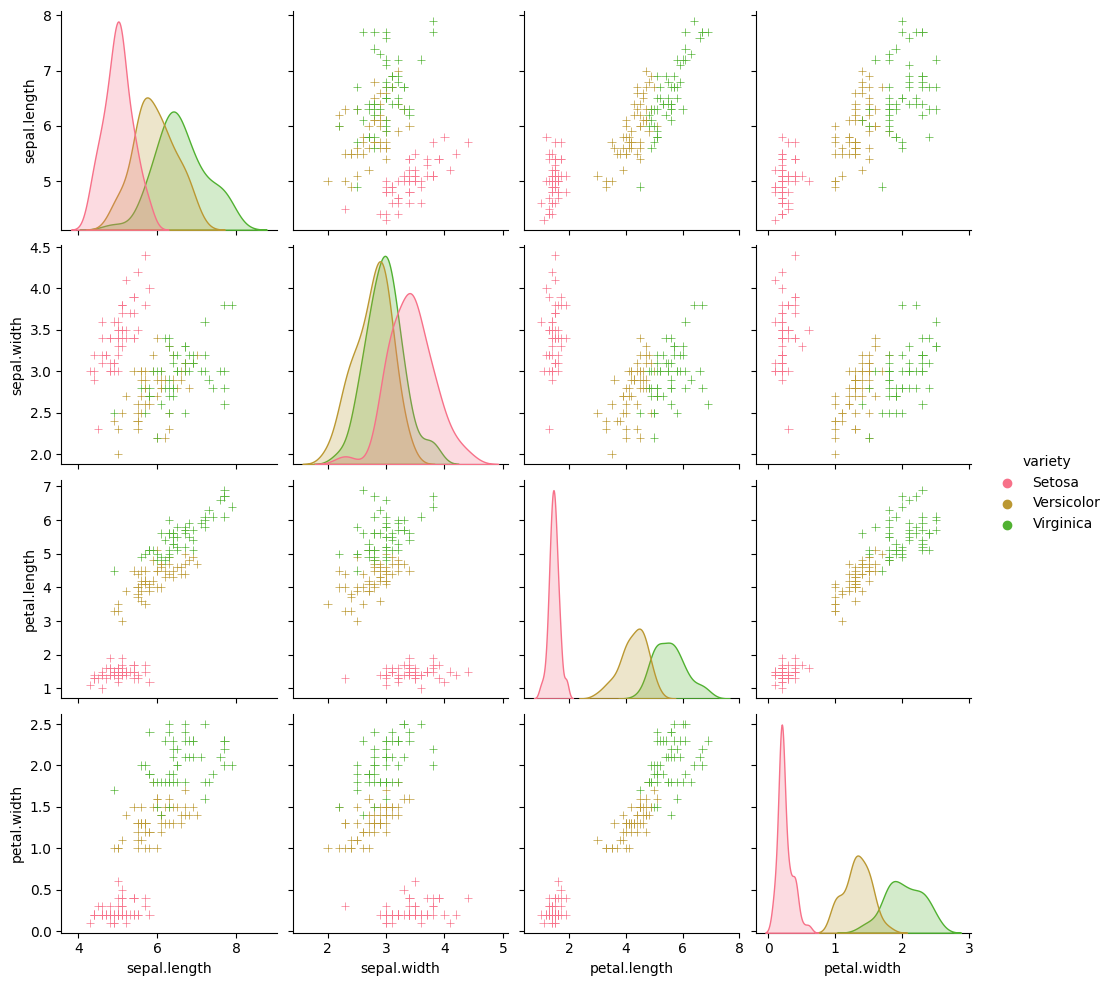

In [7]:
tmp = data
g = sns.pairplot(tmp, hue='variety', markers='+')
plt.show()

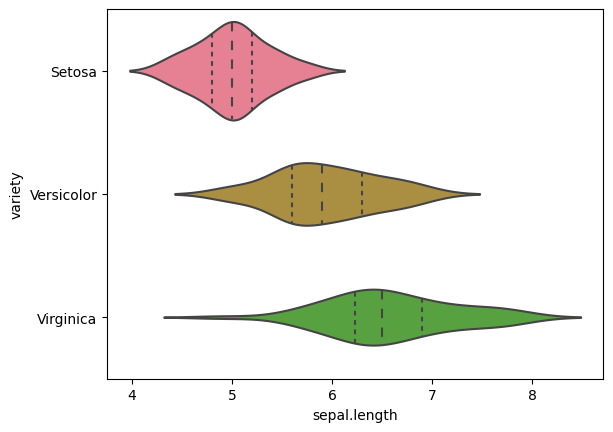

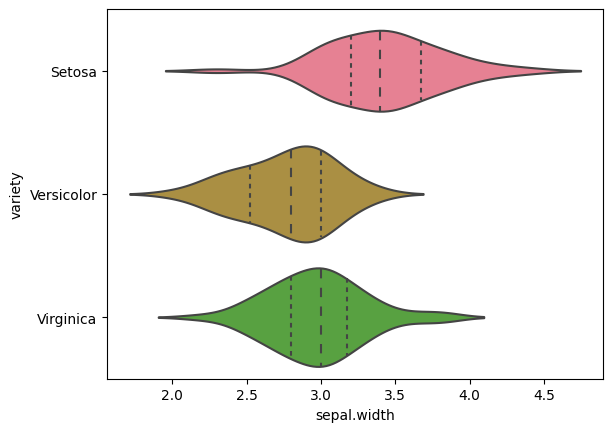

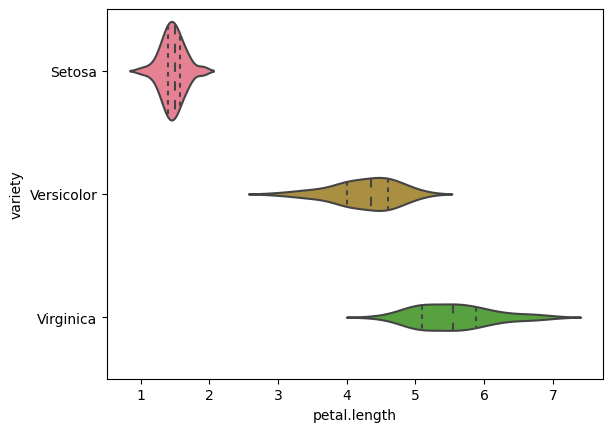

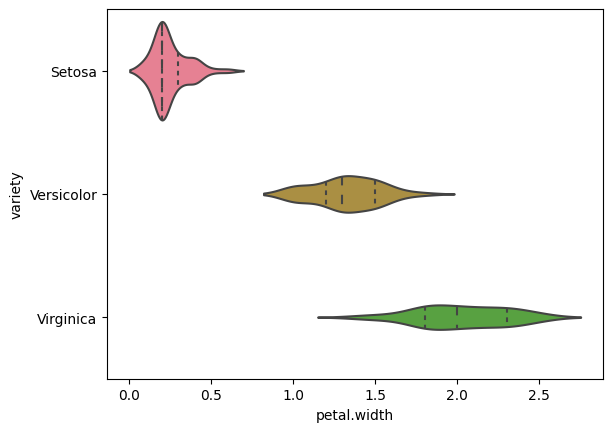

In [8]:
g = sns.violinplot(y='variety', x='sepal.length', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='variety', x='sepal.width', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='variety', x='petal.length', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='variety', x='petal.width', data=data, inner='quartile')
plt.show()

In [9]:
X = data.drop(['variety'], axis=1)
y = data['variety']
print(X.head())
print(X.shape)
print(y.head())
print(y.shape)

   sepal.length  sepal.width  petal.length  petal.width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
(150, 4)
0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object
(150,)


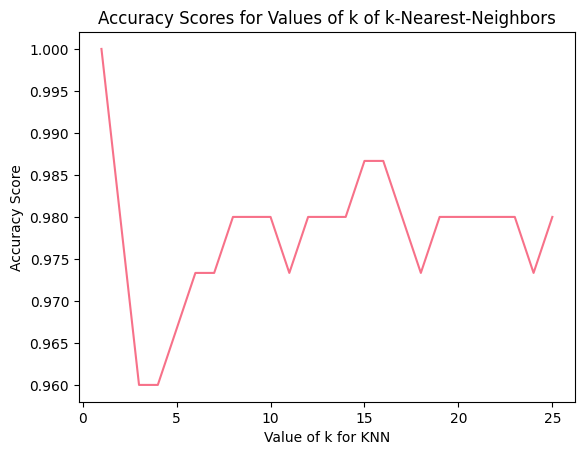

In [11]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [13]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


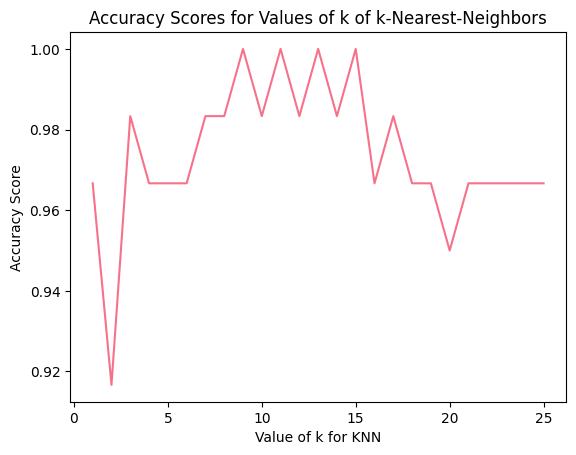

In [16]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 2, 5, 2]])
#Media 5.843333	3.057333	3.758000	1.199333

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Virginica'], dtype=object)